In [5]:
import os
import re
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms,datasets
import torch.utils.data

In [3]:
torch.manual_seed(42)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
batchsize = 128

In [6]:
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batchsize, shuffle=True)

Processing...
Done!


In [8]:
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),batch_size=batchsize, shuffle=True)

In [11]:
inp = 784
layer1 = 256
layer2 = 64
out = 10

In [28]:
class model1(nn.Module):
    def __init__(self):
        super(model1,self).__init__()
        self.fc1 = nn.Linear(inp,layer1)
        self.fc2 = nn.Linear(layer1,layer2)
        self.fc3 = nn.Linear(layer2,out)
        self.drop = nn.Dropout(0.3)
        self.relu = nn.ReLU()
    def forward(self,x):
        out = self.drop(self.relu(self.fc1(x)))
        out = self.drop(self.relu(self.fc2(out)))
        return F.log_softmax(self.fc3(out),dim=1)

In [29]:
model_relu = model1().to(device)

In [30]:
optimizer = optim.Adam(model_relu.parameters())

In [31]:
def calculate_accuracy(net,loader):
    with torch.no_grad():
        net.eval()
        correct = 0
        total = 0
        for i,(Xtrain,ytrain) in enumerate(loader):
            Xtrain = Xtrain.to(device).view(Xtrain.size(0),-1)
            ytrain = ytrain.to(device)
            
            output = net(Xtrain)
            
            _,predictions = torch.max(output,1)
            correct+=torch.sum(predictions==ytrain).item()
            total+=Xtrain.size(0)
        
        return ((correct/total)*100)

In [34]:
numepochs = 15

In [35]:
model_relu.train()
trainloss_relu = []
testacc_relu = []
for epoch in range(numepochs):
    for i,(data,labels) in enumerate(train_loader):
        data = data.to(device).view(data.size(0),-1)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model_relu(data)
        loss = F.nll_loss(output,labels)
        
        loss.backward()
        optimizer.step()
        
        trainloss_relu.append(loss)
        
    train_acc = calculate_accuracy(model_relu,train_loader)
    test_acc = calculate_accuracy(model_relu,test_loader)
    testacc_relu.append(test_acc)
    
    print("Epoch {} Train Accuracy {} Test Accuracy {}".format(epoch,train_acc,test_acc))

Epoch 0 Train Accuracy 97.175 Test Accuracy 96.67999999999999
Epoch 1 Train Accuracy 98.46333333333334 Test Accuracy 97.50999999999999
Epoch 2 Train Accuracy 98.89833333333333 Test Accuracy 97.92999999999999
Epoch 3 Train Accuracy 98.81 Test Accuracy 97.55
Epoch 4 Train Accuracy 99.24 Test Accuracy 97.83
Epoch 5 Train Accuracy 99.52333333333333 Test Accuracy 98.0
Epoch 6 Train Accuracy 99.32 Test Accuracy 97.68
Epoch 7 Train Accuracy 99.33166666666666 Test Accuracy 97.72999999999999
Epoch 8 Train Accuracy 99.69166666666666 Test Accuracy 98.07000000000001
Epoch 9 Train Accuracy 99.68 Test Accuracy 97.82
Epoch 10 Train Accuracy 99.56 Test Accuracy 97.88
Epoch 11 Train Accuracy 99.595 Test Accuracy 98.06
Epoch 12 Train Accuracy 99.61833333333333 Test Accuracy 97.89
Epoch 13 Train Accuracy 99.36333333333334 Test Accuracy 97.55
Epoch 14 Train Accuracy 99.56 Test Accuracy 97.91


In [40]:
class model2(nn.Module):
    def __init__(self):
        super(model2,self).__init__()
        self.fc1 = nn.Linear(inp,layer1)
        self.fc2 = nn.Linear(layer1,layer2)
        self.fc3 = nn.Linear(layer2,out)
        self.drop = nn.Dropout(0.3)
        self.relu = nn.SELU()
    def forward(self,x):
        out = self.drop(self.relu(self.fc1(x)))
        out = self.drop(self.relu(self.fc2(out)))
        return F.log_softmax(self.fc3(out),dim=1)

In [41]:
model_selu = model2().to(device)

In [42]:
optimizer = optim.Adam(model_selu.parameters())

In [43]:
model_selu.train()
trainloss_selu = []
testacc_selu = []
for epoch in range(numepochs):
    for i,(data,labels) in enumerate(train_loader):
        data = data.to(device).view(data.size(0),-1)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model_selu(data)
        loss = F.nll_loss(output,labels)
        
        loss.backward()
        optimizer.step()
        
        trainloss_selu.append(loss)
        
    train_acc = calculate_accuracy(model_selu,train_loader)
    test_acc = calculate_accuracy(model_selu,test_loader)
    testacc_selu.append(test_acc)
    
    print("Epoch {} Train Accuracy {} Test Accuracy {}".format(epoch,train_acc,test_acc))

Epoch 0 Train Accuracy 94.98 Test Accuracy 94.67
Epoch 1 Train Accuracy 97.14500000000001 Test Accuracy 96.34
Epoch 2 Train Accuracy 98.02833333333332 Test Accuracy 97.19
Epoch 3 Train Accuracy 98.39833333333333 Test Accuracy 97.32
Epoch 4 Train Accuracy 98.42666666666666 Test Accuracy 97.15
Epoch 5 Train Accuracy 99.06166666666667 Test Accuracy 97.6
Epoch 6 Train Accuracy 99.09666666666666 Test Accuracy 97.71
Epoch 7 Train Accuracy 99.31166666666667 Test Accuracy 97.83
Epoch 8 Train Accuracy 99.22833333333332 Test Accuracy 97.48
Epoch 9 Train Accuracy 99.46833333333333 Test Accuracy 97.83
Epoch 10 Train Accuracy 99.36166666666666 Test Accuracy 97.47
Epoch 11 Train Accuracy 99.60333333333334 Test Accuracy 97.92
Epoch 12 Train Accuracy 99.45 Test Accuracy 97.72999999999999
Epoch 13 Train Accuracy 99.57333333333334 Test Accuracy 97.65
Epoch 14 Train Accuracy 99.595 Test Accuracy 98.08


In [44]:
import matplotlib.pyplot as plt

In [47]:
iterations = range(numepochs)

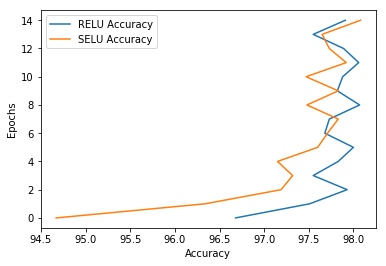

In [48]:
plt.plot(testacc_relu,iterations,label='RELU Accuracy')
plt.plot(testacc_selu,iterations,label='SELU Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [49]:
batches = range(len(trainloss_relu))

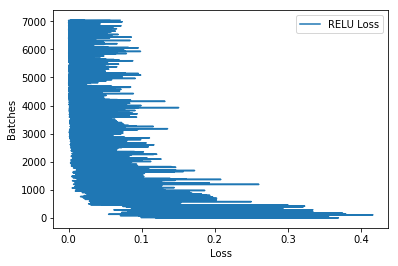

In [52]:
plt.plot(trainloss_relu,batches,label='RELU Loss')
plt.xlabel('Loss')
plt.ylabel('Batches')
plt.legend()
plt.show()

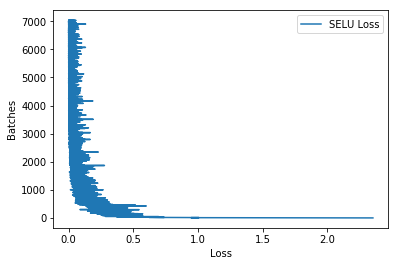

In [53]:
plt.plot(trainloss_selu,batches,label='SELU Loss')
plt.xlabel('Loss')
plt.ylabel('Batches')
plt.legend()
plt.show()